# Plot sentiment series
In which we visualize the trajectory of sentiment time series to determine which are the most interesting.

In [103]:
import pandas as pd
import json, os, re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [2]:
with open('../data/text_category_stats/episodeLevel.json') as sentiment_file:
    sentiment_data = json.load(sentiment_file)

In [6]:
episode_names = sorted([e['name'] for e in sentiment_data])
print(episode_names)

[u'S1E1.tsv', u'S1E10.tsv', u'S1E2.tsv', u'S1E3.tsv', u'S1E4.tsv', u'S1E5.tsv', u'S1E6.tsv', u'S1E7.tsv', u'S1E8.tsv', u'S1E9.tsv', u'S2E1.tsv', u'S2E10.tsv', u'S2E2.tsv', u'S2E3.tsv', u'S2E4.tsv', u'S2E5.tsv', u'S2E6.tsv', u'S2E7.tsv', u'S2E8.tsv', u'S2E9.tsv', u'S3E1.tsv', u'S3E10.tsv', u'S3E2.tsv', u'S3E3.tsv', u'S3E4.tsv', u'S3E5.tsv', u'S3E6.tsv', u'S3E7.tsv', u'S3E8.tsv', u'S3E9.tsv', u'S4E1.tsv', u'S4E10.tsv', u'S4E2.tsv', u'S4E3.tsv', u'S4E4.tsv', u'S4E5.tsv', u'S4E6.tsv', u'S4E7.tsv', u'S4E8.tsv', u'S4E9.tsv', u'S5E1.tsv', u'S5E10.tsv', u'S5E2.tsv', u'S5E3.tsv', u'S5E4.tsv', u'S5E5.tsv', u'S5E6.tsv', u'S5E7.tsv', u'S5E8.tsv', u'S5E9.tsv', u'S6E1.tsv', u'S6E10.tsv', u'S6E2.tsv', u'S6E3.tsv', u'S6E4.tsv', u'S6E5.tsv', u'S6E6.tsv', u'S6E7.tsv', u'S6E8.tsv', u'S6E9.tsv']


In [113]:
episode_numbers = dict(zip(episode_names, 
                           list(map(lambda x: ((int(re.findall('(?<=S)[0-9]', x)[0]) - 1 )*10 + 
                                               int(re.findall('(?<=E)[0-9]+', x)[0])), 
                                    episode_names
                                   ))
                           ))
print(episode_numbers)

{u'S6E9.tsv': 59, u'S4E4.tsv': 34, u'S1E7.tsv': 7, u'S1E1.tsv': 1, u'S3E8.tsv': 28, u'S2E9.tsv': 19, u'S5E6.tsv': 46, u'S4E9.tsv': 39, u'S1E8.tsv': 8, u'S4E6.tsv': 36, u'S5E1.tsv': 41, u'S6E4.tsv': 54, u'S1E5.tsv': 5, u'S2E4.tsv': 14, u'S3E1.tsv': 21, u'S1E6.tsv': 6, u'S5E2.tsv': 42, u'S2E3.tsv': 13, u'S3E3.tsv': 23, u'S5E8.tsv': 48, u'S3E7.tsv': 27, u'S4E10.tsv': 40, u'S6E6.tsv': 56, u'S4E7.tsv': 37, u'S1E10.tsv': 10, u'S4E8.tsv': 38, u'S5E4.tsv': 44, u'S6E5.tsv': 55, u'S2E7.tsv': 17, u'S4E2.tsv': 32, u'S4E3.tsv': 33, u'S6E3.tsv': 53, u'S3E9.tsv': 29, u'S1E4.tsv': 4, u'S1E9.tsv': 9, u'S1E3.tsv': 3, u'S2E6.tsv': 16, u'S3E10.tsv': 30, u'S3E2.tsv': 22, u'S5E5.tsv': 45, u'S2E5.tsv': 15, u'S4E1.tsv': 31, u'S4E5.tsv': 35, u'S2E2.tsv': 12, u'S2E8.tsv': 18, u'S6E2.tsv': 52, u'S6E8.tsv': 58, u'S5E10.tsv': 50, u'S3E5.tsv': 25, u'S6E1.tsv': 51, u'S3E4.tsv': 24, u'S3E6.tsv': 26, u'S2E10.tsv': 20, u'S6E7.tsv': 57, u'S5E9.tsv': 49, u'S2E1.tsv': 11, u'S6E10.tsv': 60, u'S5E7.tsv': 47, u'S1E2.tsv': 2,

In [8]:
category_names = sorted([k for k in sentiment_data[0].keys() if k != 'name'])
print(category_names)

[u'achievement', u'adverbs', u'anger', u'anxiety', u'auxiliary_verbs', u'bio', u'body', u'causation', u'certainty', u'cognitive_mech', u'death', u'discrepancies', u'family', u'feel', u'first_person_plural', u'first_person_singular', u'friends', u'future_tense', u'health', u'hear', u'home', u'humans', u'inhibition', u'insight', u'money', u'negation', u'negative_affect', u'past_tense', u'percept', u'positive_affect', u'present_tense', u'relative', u'religion', u'sadness', u'second_person', u'see', u'sexual', u'social', u'swear', u'tentativeness', u'third_person', u'verbs', u'work']


## Collect series
To start, get sum of raw frequencies for each category at each timestep.

In [114]:
sentiment_data = sorted(sentiment_data, key=lambda x: episode_numbers[x['name']])

In [115]:
sentiment_series = {c : [sum(e[c].values()) for e in sentiment_data] for c in category_names}

In [16]:
# TODO: normalization! but then we need full vocab for each episode...


## Visualize series
Raw frequency first.

15 x 3


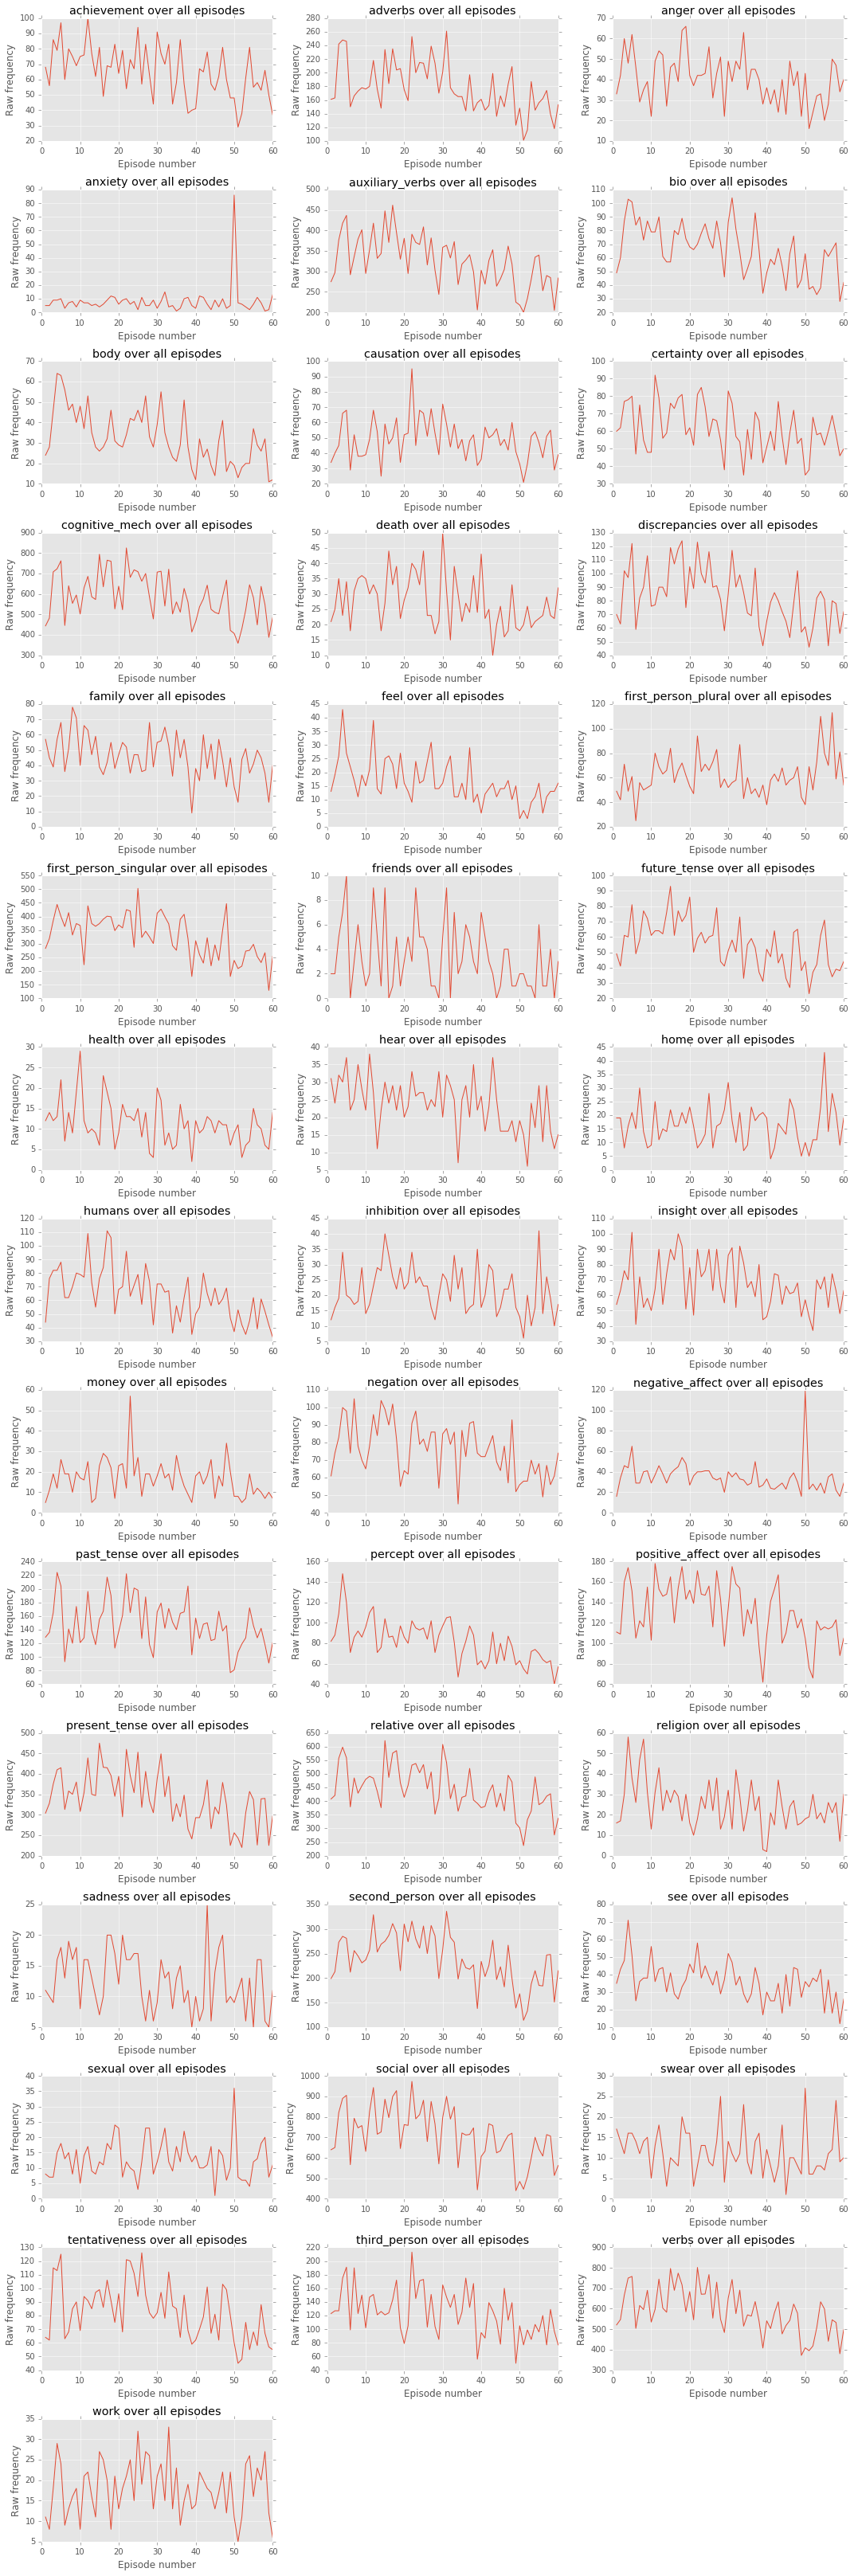

In [117]:
dummy_dates = range(1, len(episode_names)+1)
cols = 3
rows = int(len(category_names) / cols) + 1
plt.style.use('ggplot')
fig = plt.figure(figsize=(5*cols,3*rows))
print('%d x %d'%(rows, cols))
for i, c in enumerate(category_names):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.plot(dummy_dates, sentiment_series[c])
    ax.set_title('%s over all episodes'%(c))
    ax.set_ylabel('Raw frequency')
    ax.set_xlabel('Episode number')
plt.tight_layout()
plt.show()

General trends:
- Slow increase toward 20s, then gradual decrease across all categories. Less dialogue overall?
- Low-count categories tend to be spikier (e.g. "friends", "anxiety").
- Surprisingly low negative and positive affect! Especially compared to cognitive mechanisms.

In [ ]:
interesting_categories = 

TODO: visualize normalized series to account for especially verbose episodes.